# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])
data

array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

In [3]:
df = pd.DataFrame()
df["Year"] = range(2014, 2041)
df["Prices"] = data
df.tail()

,Year,Prices
22,2036,13.357134
23,2037,13.559012
24,2038,13.858610
25,2039,14.135924
26,2040,14.436149


1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

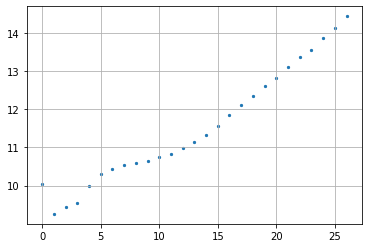

In [4]:
x = df["Year"] - 2014
y = df["Prices"]
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

In [5]:
def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 2.3704889518159167
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([2.05636024e-06, 8.16583633e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([9.11567644, 0.18667055])

In [6]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 0.8443845192081306
 hess_inv: array([[ 1.44225545e-01, -2.17569843e-02,  6.84181895e-04],
       [-2.17569843e-02,  4.57454506e-03, -1.64203638e-04],
       [ 6.84181895e-04, -1.64203638e-04,  6.31552434e-06]])
      jac: array([ 8.82148743e-06,  2.88337469e-06, -7.45058060e-09])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.59128765e+00, 7.25239491e-02, 4.39025277e-03])

In [7]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 0.8404346758233129
 hess_inv: array([[ 2.27239725e-01, -6.41154386e-02,  4.83488395e-03,
        -1.06428258e-04],
       [-6.41154386e-02,  2.61883485e-02, -2.28214173e-03,
         5.43061204e-05],
       [ 4.83488395e-03, -2.28214173e-03,  2.13852044e-04,
        -5.32144302e-06],
       [-1.06428258e-04,  5.43061204e-05, -5.32144302e-06,
         1.36446952e-07]])
      jac: array([0.00000000e+00, 7.45058060e-09, 1.11758709e-07, 1.49011612e-06])
  message: 'Optimization terminated successfully.'
     nfev: 95
      nit: 9
     njev: 19
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495841e-02, 3.20207436e-03, 3.04659703e-05])

**Ahora graficaremos los polinomios y los errores**

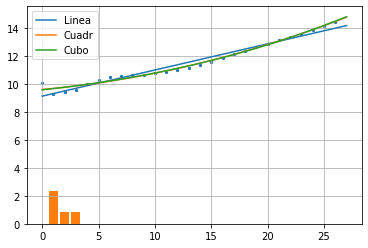

In [8]:
xn = np.linspace(0, 27, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Linea")
plt.plot(xn, yn2, label="Cuadr")
plt.plot(xn, yn3, label="Cubo")
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.legend(loc="best")
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [9]:
data = pd.read_csv('population_data.csv')
data.head()

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


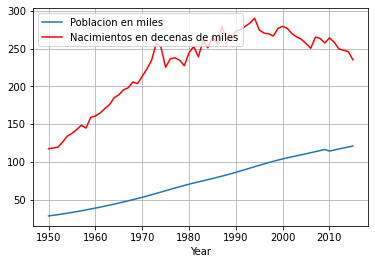

In [10]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

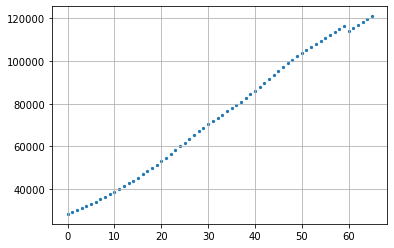

In [16]:
x1 = data["Year"] - 1950
y1 = data["Poblacion"]
plt.figure()
plt.scatter(x1, y1, s=5)
plt.grid()

Polinomio G.1

In [12]:
theta_inicial_4 = np.random.rand(2)
sol4 = opt.minimize(funcion_de_costo_1,
                   theta_inicial_4,
                   args=(x1, y1))
costo_4 = sol4.fun
resultados_4 = sol4.x
sol4

      fun: 212137169.5493582
 hess_inv: array([[ 8.40765263e-08, -9.75295567e-08],
       [-9.75295567e-08,  4.02616171e-06]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 144
      nit: 15
     njev: 48
   status: 0
  success: True
        x: array([24138.0331771 ,  1543.97300623])

Polinomio G.2

In [13]:
theta_inicial_5 = np.random.rand(3)
sol5 = opt.minimize(funcion_de_costo_2,
                   theta_inicial_5,
                   args=(x1, y1))
costo_5 = sol5.fun
resultados_5 = sol5.x
sol5

      fun: 210941621.47922397
 hess_inv: array([[ 1.13206923e-08, -1.08745212e-08, -4.46266390e-10],
       [-1.08745212e-08,  1.20803616e-08, -1.20575898e-09],
       [-4.46266390e-10, -1.20575898e-09,  1.65203971e-09]])
      jac: array([4., 4., 4.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 255
      nit: 14
     njev: 61
   status: 2
  success: False
        x: array([2.44256565e+04, 1.51700915e+03, 4.14824318e-01])

Polinomio G.3

In [14]:
theta_inicial_6 = np.random.rand(4)
sol6 = opt.minimize(funcion_de_costo_3,
                   theta_inicial_6,
                   args=(x1, y1))
costo_6 = sol6.fun
resultados_6 = sol6.x
sol6

      fun: 25240442.639972124
 hess_inv: array([[ 1.16823994e-01, -1.36176197e-02,  0.00000000e+00,
        -3.73649792e-06],
       [-1.36176197e-02,  2.13483215e-03,  0.00000000e+00,
         7.02737479e-07],
       [ 0.00000000e+00,  0.00000000e+00,  1.42108547e-14,
         0.00000000e+00],
       [-3.73649792e-06,  7.02737479e-07,  0.00000000e+00,
         2.74276514e-10]])
      jac: array([ 0.  ,  0.  , -1.  , -0.25])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 268
      nit: 10
     njev: 53
   status: 2
  success: False
        x: array([ 2.84777566e+04,  7.39079179e+02,  3.05648715e+01, -3.09231862e-01])

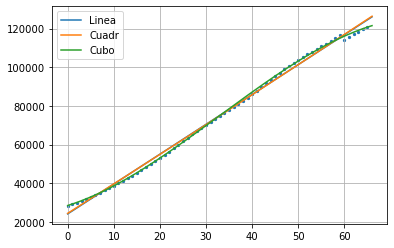

In [21]:
xn2 = np.linspace(0, 66, 200)
yn4 = resultados_4[0] + resultados_4[1]*xn2
yn5 = resultados_5[0] + resultados_5[1]*xn2 + resultados_5[2]*xn2**2
yn6 = resultados_6[0] + resultados_6[1]*xn2 + resultados_6[2]*xn2**2 + resultados_6[3]*xn2**3

plt.figure()
plt.scatter(x1, y1, s=5)
plt.plot(xn2, yn4, label="Linea")
plt.plot(xn2, yn5, label="Cuadr")
plt.plot(xn2, yn6, label="Cubo")
plt.legend(loc="best")
plt.grid()

**Graficar el error cuadrático contra número de términos**

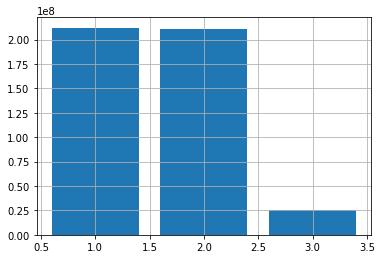

In [22]:
plt.figure()
plt.bar([1, 2, 3], [costo_4, costo_5, costo_6])
plt.grid()

**Ahora haremos lo mismo pero con nacimientos**

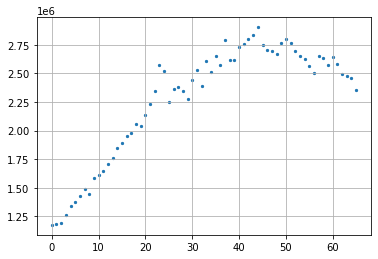

In [23]:
x2 = data["Year"] - 1950
y2 = data["Nacimientos"]
plt.figure()
plt.scatter(x2, y2, s=5)
plt.grid()

In [34]:
theta_inicial_7 = np.random.rand(2)
sol7 = opt.minimize(funcion_de_costo_1,
                   theta_inicial_7,
                   args=(x2, y2))
costo_7 = sol7.fun
resultados_7 = sol7.x
sol7

      fun: 4737912763689.639
 hess_inv: array([[ 3.08562061e-03, -3.90364860e-05],
       [-3.90364860e-05,  3.83652340e-06]])
      jac: array([     0., -65536.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 216
      nit: 9
     njev: 68
   status: 2
  success: False
        x: array([1562821.70163782,   21979.93319811])

In [35]:
theta_inicial_8 = np.random.rand(3)
sol8 = opt.minimize(funcion_de_costo_2,
                   theta_inicial_8,
                   args=(x2, y2))
costo_8 = sol8.fun
resultados_8 = sol8.x
sol8

      fun: 492921255660.34033
 hess_inv: array([[ 1.09191374e-01, -7.16555521e-03,  9.25594372e-05],
       [-7.16555521e-03,  5.46807143e-04, -7.47738658e-06],
       [ 9.25594372e-05, -7.47738658e-06,  1.06075820e-07]])
      jac: array([    0., -4096., 16384.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 134
      nit: 8
     njev: 31
   status: 2
  success: False
        x: array([ 1.02127116e+06,  7.27682083e+04, -7.81439967e+02])

In [36]:
theta_inicial_9 = np.random.rand(4)
sol9 = opt.minimize(funcion_de_costo_3,
                   theta_inicial_9,
                   args=(x2, y2))
costo_9 = sol9.fun
resultados_9 = sol9.x
sol9

      fun: 441782717003.1797
 hess_inv: array([[ 2.71973769e+00,  2.48319577e-02, -3.57047476e-03,
         2.24722887e-05],
       [ 2.48319577e-02,  5.25984505e-04, -4.73459632e-05,
         3.77858775e-07],
       [-3.57047476e-03, -4.73459632e-05,  5.48012263e-06,
        -3.91324634e-08],
       [ 2.24722887e-05,  3.77858775e-07, -3.91324634e-08,
         3.04586741e-10]])
      jac: array([-4.09600000e+03, -6.96320000e+04, -5.13228800e+06, -3.10996992e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 332
      nit: 11
     njev: 64
   status: 2
  success: False
        x: array([ 1.08808065e+06,  5.99041659e+04, -2.82363862e+02, -5.12162559e+00])

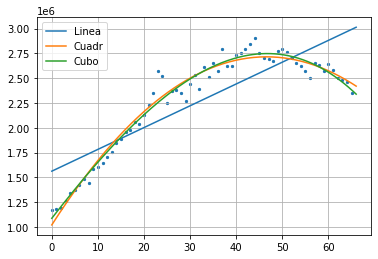

In [37]:
xn3 = np.linspace(0, 66, 200)
yn7 = resultados_7[0] + resultados_7[1]*xn3
yn8 = resultados_8[0] + resultados_8[1]*xn3 + resultados_8[2]*xn3**2
yn9 = resultados_9[0] + resultados_9[1]*xn3 + resultados_9[2]*xn3**2 + resultados_9[3]*xn3**3

plt.figure()
plt.scatter(x2, y2, s=5)
plt.plot(xn3, yn7, label="Linea")
plt.plot(xn3, yn8, label="Cuadr")
plt.plot(xn3, yn9, label="Cubo")
plt.legend(loc="best")
plt.grid()

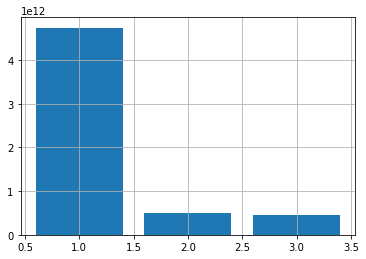

In [38]:
plt.figure()
plt.bar([1, 2, 3], [costo_7, costo_8, costo_9])
plt.grid()

El cubico se ajusta mejor y tiene menor error